In [1]:
import math
from itertools import combinations

import networkx as nx
from matplotlib import pyplot as plt

import randy


In [2]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))


def plot_goose(g):
    """Draw the graph with nodes in the common core sligthly bigger"""
    node_size = [300 if core else 100 for _,
                 core in g.nodes(data='core', default=False)]
    node_color = ['red' if core else 'black' for _,
                  core in g.nodes(data='core', default=False)]
    node_color = [n for _, n in g.nodes(data='class')]
    edge_color = ['red' if core else 'black' for _, _,
                  core in g.edges(data='core', default=False)]
    nx.draw(g, node_size=node_size, node_color=node_color,
            cmap=plt.cm.tab20, edge_color=edge_color)
    plt.show()


def dump_goose(g):
    """Dump graph shuffling node id's"""
    pomegranate = list(g.nodes())
    randy.shuffle(pomegranate)
    dump = ''
    dump += f'{g.number_of_nodes()} {g.number_of_edges()}\n'
    dump += ' '.join([str(g.nodes[n]['class']) for n in pomegranate]) + '\n'
    edges = list()
    for n1, n2 in g.edges():
        edges.append((pomegranate[n1], pomegranate[n2]))
    dump += '\n'.join(f'{s} {d}' for s, d in sorted(edges))
    return dump


In [3]:
def foie_gras(family_size=5, core_nodes=10, density=.5, family_divergence=.1, num_classes=1, directed=False, **options):
    """Create a family of graph with a common core"""

    core = nx.random_graphs.fast_gnp_random_graph(
        core_nodes, density, directed=directed)
    for n in core.nodes():
        core.nodes[n]['class'] = randy.choice(range(num_classes))
        core.nodes[n]['core'] = True
    for s, d in core.edges():
        core.edges[s, d]['core'] = True

    geese = list()
    for f in range(family_size):
        new_goose = nx.DiGraph(core) if directed else nx.Graph(core)
        # add random edges
        while randy.boolean(p_true=sigmoid(family_divergence)):
            s, d = randy.choice(new_goose.nodes()), randy.choice(
                new_goose.nodes())
            new_goose.add_edge(s, d)
        avg_extra_nodes = core_nodes * family_divergence
        # add random nodes
        for new_node in range(core_nodes, int(randy.scale_random(core_nodes, core_nodes+2*avg_extra_nodes,
                                                                 core_nodes+avg_extra_nodes, 1))):
            new_goose.add_node(new_node)
            new_goose.nodes[new_node]['class'] = randy.choice(
                range(num_classes))
            for d in new_goose.nodes():
                if randy.boolean(p_true=density):
                    new_goose.add_edge(new_node, d)
        geese.append(new_goose)

    return geese


In [4]:
def dump_graph_family(familiy, family_name):
    for n, graph in enumerate(family):
        print(f"# GRAPH {n}")
        plot_goose(graph)
        with open(f'{family_name}_g{n}.txt', 'w') as f:
            f.write(dump_goose(graph))


# GRAPH 0


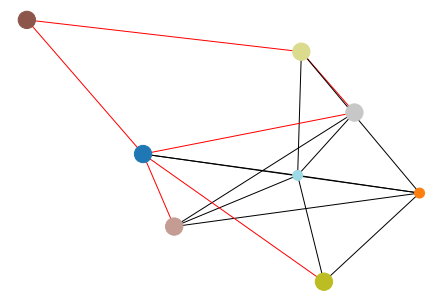

# GRAPH 1


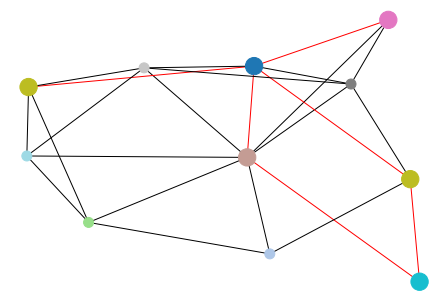

# GRAPH 2


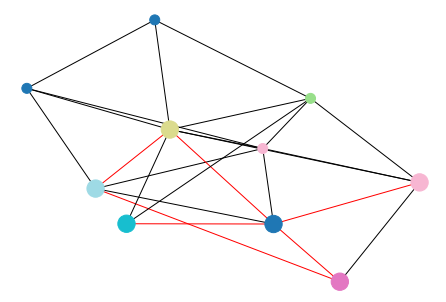

# GRAPH 3


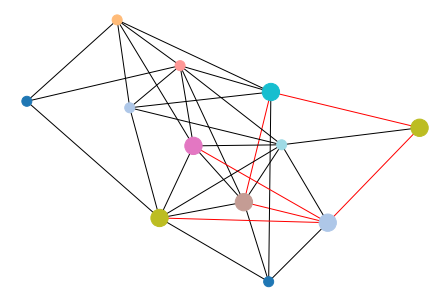

# GRAPH 0


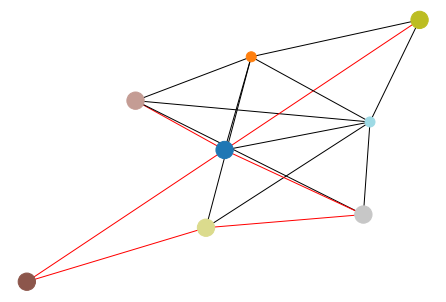

# GRAPH 1


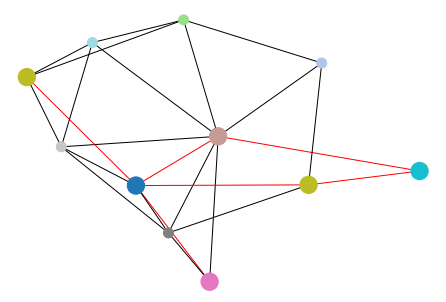

# GRAPH 2


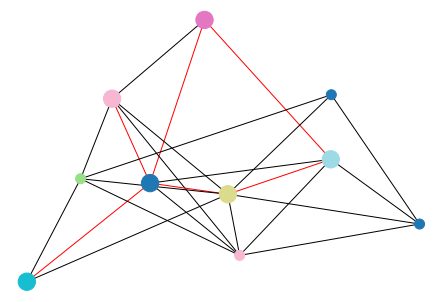

# GRAPH 3


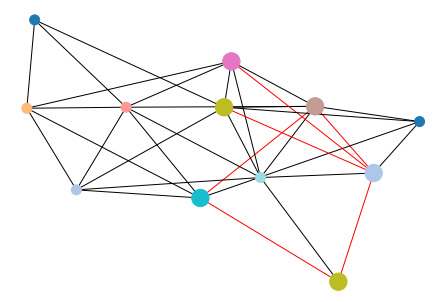

In [5]:
family = foie_gras(family_size=4, core_nodes=6, density=.5,
                   family_divergence=1, num_classes=120)
dump_graph_family(family, "greylag")

directed_family = foie_gras(family_size=4, core_nodes=6, density=.5,
                            family_divergence=1, num_classes=120, directed=True)
dump_graph_family(directed_family, "directed_pinkfooted")
